<a href="https://colab.research.google.com/github/Soham513/Weather_Classification/blob/main/Fognet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
import pathlib
dataset_url = "/content/drive/MyDrive/advance ai project/dataset"
data_dir = pathlib.Path('/content/drive/MyDrive/advance ai project/dataset', origin="/content/drive/MyDrive/advance ai project/dataset", untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
print(data_dir)

/content/drive/MyDrive/advance ai project/dataset


/content/drive/MyDrive/advance ai project/dataset/fogsmog/4075.jpg


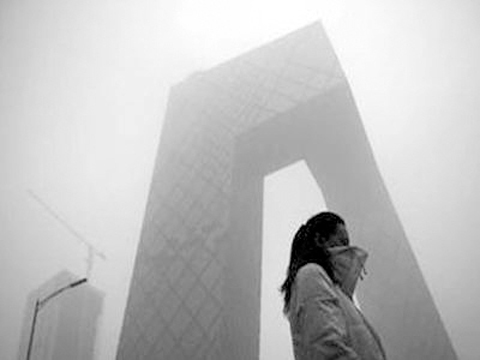

In [ ]:
dataset = list(data_dir.glob('fogsmog/*.jpg'))
print(dataset[0])
PIL.Image.open(str(dataset[0]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1947 files belonging to 3 classes.
Using 1558 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1947 files belonging to 3 classes.
Using 389 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['fogsmog', 'frost', 'snow']


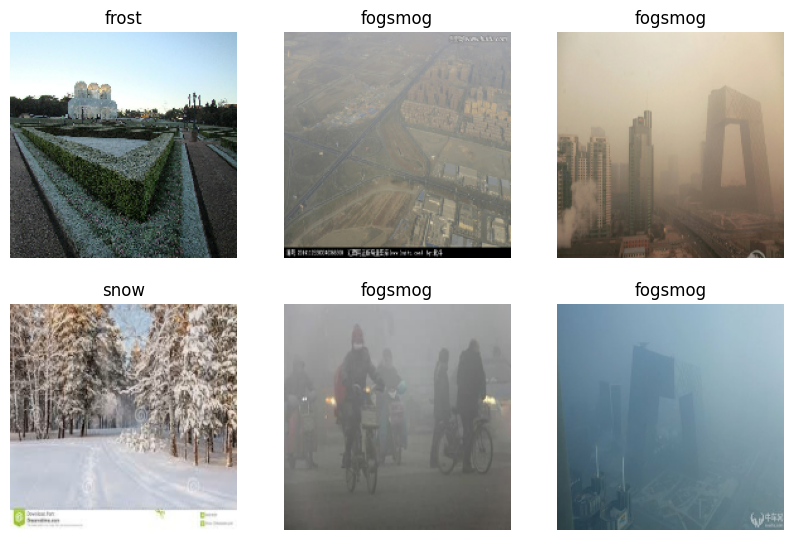

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 5)                 2565      
 apper)                                                          
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
 resnet_model.summary()
for data, labels in train_ds.take(1):
    print("Input shape:", data.shape)
    print("Label shape:", labels.shape)  # Ensure it matches the model's output shape

resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 10
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 5)                 2565      
 apper)                                                          
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

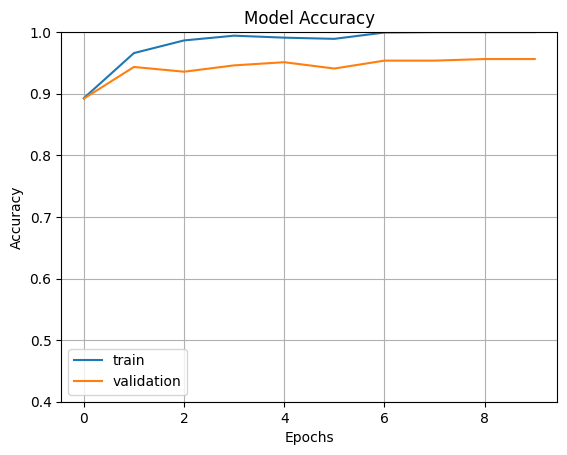

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

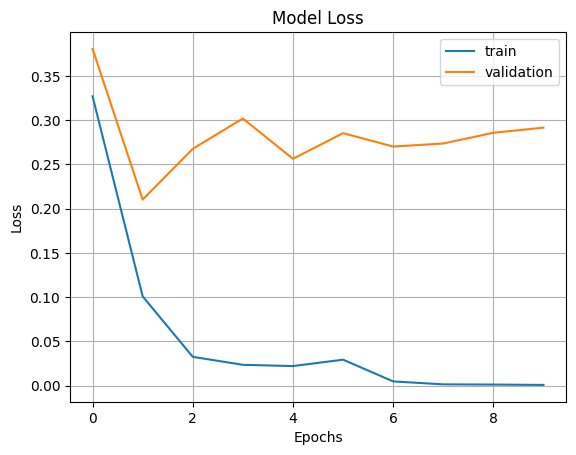

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
import cv2
image=cv2.imread(str(dataset[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 1s 1s/step
[[9.9999988e-01 1.2064759e-12 1.4298382e-07 2.4935697e-15 8.4712484e-20]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is fogsmog


In [ ]:
y_pred = np.argmax(pred, axis=1)


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np


y_true = np.random.randint(0, 4, 100)  # Example: Four classes (0, 1, 2, 3) for weather types
y_pred = np.random.randint(0, 4, 100)  # Randomly generated predicted labels

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 6  6  8  5]
 [ 9  5  6  6]
 [ 4  4  6  6]
 [ 6  8 10  5]]
